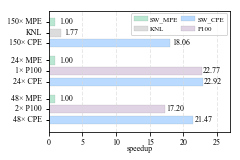

In [3]:
#! /usr/bin/env python# -*- coding: utf-8 -*-
import sys 
reload(sys) 
sys.setdefaultencoding('utf8')
"""
绘制加速比柱状图
Author：shaomingshan
Input：
    version：需要对比的版本
    speedup：加速比
"""


import matplotlib.pyplot as plt
import numpy as np

# 3072k
sw_mpe_150 = 0.70
knl = 1.24
sw_opt_150 = 12.64

sw_mpe_24 = 0.13
p100_1 = 2.96
sw_opt_24 = 2.98

sw_mpe_48 = 0.225
p100_2 = 3.87
sw_opt_48 = 4.83

group1 = [sw_opt_48, p100_2, sw_mpe_48]
group2 = [sw_opt_24, p100_1, sw_mpe_24]
group3 = [sw_opt_150, knl, sw_mpe_150]

label1 = ['48× CPE', '24× CPE', '150× CPE']
label2 = ['2× P100', '1× P100', 'KNL']
label3 = ['48× MPE', '24× MPE', '150× MPE']

speedup1 = [0] * len(group1)
speedup2 = [0] * len(group2)
speedup3 = [0] * len(group3)

speedup_num1 = [0] * len(group1)
speedup_num2 = [0] * len(group2)
speedup_num3 = [0] * len(group3)

all_speedup = [0] * (len(group1) + len(group2) + len(group3))

tick_length = 0.4
tick_width = 1
tick_gap = 1

margin_top = 0.3
margin_right = 4
text_gap = 1.5
rotation = 0
width, height = 3.5, 2.3  # inch
title = u''
xlabel = u'speedup'  # u'ns/day'
ylabel = u''
# bar_width = 0.5
bar_width = 0.21
gap_width = 1.32 * bar_width
text_size = 8
font_size = 7
legend1 = 'SW_MPE'
legend2 = 'KNL'
legend3 = 'P100'
legend4 = 'SW_CPE'
grid_color = '#d9d9d9'

color1 = '#b3e5cc'  # 绿
color2 = '#d9d9d9'  # 灰
color3 = '#dccfe2'  # 紫
color4 = '#b3d8ff'  # 蓝

# color1 = '#a5a5a5'  # 绿
# color2 = '#fcbd08'  # 橙
# color3 = '#eb7c33'  # 红
# color4 = '#5b9bd3'  # 蓝Z

# color1 = '#e99d9d'  # 绿
# color2 = '#6aecd2'  # 橙
# color3 = '#ffb574'  # 红
# color4 = '#619afe'  # 蓝

# color1 = '#7ba79d'  # 绿
# color2 = '#dd8047'  # 橙
# color3 = '#968c8c'  # 红
# color4 = '#548bb7'  # 蓝

linewidth = 0.1
edgecolor = "#4d4d4d"


def get_max(data):
    max_num = float('-inf')
    for i in data:
        max_num = i if i > max_num else max_num
    return max_num


def get_speedup(ns_day):
    my_speedup = [0] * len(ns_day)
    for i in range(len(ns_day)):
        my_speedup[i] = ns_day[i] / ns_day[len(ns_day)-1]
    return my_speedup


def draw(save_path):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    fig = plt.figure()
    fig.set_size_inches(width, height)
    # plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.15)
    # plt.subplots_adjust(left=0.18, bottom=0.17)
    plt.subplots_adjust(left=0.18, bottom=0.15)

    # 3072k
    plt.barh(2 + 2 * gap_width, speedup3[2], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color1, alpha=0.9, label=legend1, zorder=0)
    plt.barh(2 + 1 * gap_width, speedup3[1], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color2, alpha=0.9, label=legend2, zorder=0)
    plt.barh(2 + 0 * gap_width, speedup3[0], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color4, alpha=0.9, label=legend4, zorder=0)

    plt.barh(1 + 2 * gap_width, speedup2[2], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color1, alpha=0.9, zorder=0)
    plt.barh(1 + 1 * gap_width, speedup2[1], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color3, alpha=0.9, label=legend3, zorder=0)
    plt.barh(1 + 0 * gap_width, speedup2[0], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color4, alpha=0.9, zorder=0)

    plt.barh(0 + 2 * gap_width, speedup1[2], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color1, alpha=0.9, zorder=0)
    plt.barh(0 + 1 * gap_width, speedup1[1], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color3, alpha=0.9, zorder=0)
    plt.barh(0 + 0 * gap_width, speedup1[0], height=bar_width, linewidth=linewidth, edgecolor=edgecolor,
             color=color4, alpha=0.9, zorder=0)

    for x, y1, y2, y3 in zip(np.arange(len(group1)), speedup_num1, speedup_num2, speedup_num3):
        plt.text(y1 + text_gap, x + 0 * gap_width, '%.2f' % y1, ha='center', va='center', fontsize=text_size)
        plt.text(y2 + text_gap, x + 1 * gap_width, '%.2f' % y2, ha='center', va='center', fontsize=text_size)
        plt.text(y3 + text_gap, x + 2 * gap_width, '%.2f' % y3, ha='center', va='center', fontsize=text_size)

    for x, l1, l2, l3 in zip(np.arange(len(group1)), label1, label2, label3):
        plt.text(-tick_gap, x + 0 * gap_width, l1, ha='right', va='center', fontsize=text_size)
        plt.text(-tick_gap, x + 1 * gap_width, l2, ha='right', va='center', fontsize=text_size)
        plt.text(-tick_gap, x + 2 * gap_width, l3, ha='right', va='center', fontsize=text_size)

        plt.hlines(x + 0 * gap_width, -tick_length, 0, color='k',  clip_on=False, lw=tick_width)
        plt.hlines(x + 1 * gap_width, -tick_length, 0, color='k',  clip_on=False, lw=tick_width)
        plt.hlines(x + 2 * gap_width, -tick_length, 0, color='k',  clip_on=False, lw=tick_width)

    # x label
    plt.text((get_max(all_speedup) + margin_right) / 2, -0.75,
             xlabel, ha='center', va='center', fontsize=text_size)

    plt.title(title)
    plt.tick_params(labelsize=text_size)
    plt.gca().axes.get_yaxis().set_visible(False)

    plt.grid(axis='x', linestyle='--', linewidth=1, c=grid_color, alpha=0.6, zorder=-10)
    plt.legend(loc='upper right', fontsize=font_size,
               ncol=2, columnspacing=0.43, borderpad=0.4, borderaxespad=0.4,
               handletextpad=0.33, handlelength=2)
    plt.ylim(0 - margin_top, len(group1) - 1 + 2*gap_width + margin_top)
    plt.yticks([index + gap_width for index in range(3)])
    plt.xlim(0, get_max(all_speedup) + margin_right)
    # 3072k
    # plt.xticks([0, 1, 2, 3, 4, 5, 6 , 7,])
    # 1536k
    # plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    plt.savefig(save_path)
    plt.show()


if __name__ == '__main__':
    speedup1 = get_speedup(group1)
    speedup2 = get_speedup(group2)
    speedup3 = get_speedup(group3)
    print(speedup1)
    print(speedup2)
    print(speedup3)
    print()

    speedup_num1 = [speedup1[0], speedup2[0], speedup3[0]]
    speedup_num2 = [speedup1[1], speedup2[1], speedup3[1]]
    speedup_num3 = [speedup1[2], speedup2[2], speedup3[2]]

    for i in range(len(speedup1)):
        all_speedup[i] = speedup1[i]
        all_speedup[i+3] = speedup2[i]
        all_speedup[i+6] = speedup3[i]

    for i in [0, 3, 6]:
        print(all_speedup[i], all_speedup[i+1], all_speedup[i+2])

    print()
    print(get_max(all_speedup))

    file = 'knl_gpu.pdf'
    draw(file)
